In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__) # check tensorflow version

2.11.0


# 1. Load data

In [3]:
# Load the Fashion-MNIST dataset
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [4]:
# Show data shape
print("Train images shape ", train_images.shape)
print("Test images shape ", test_images.shape)

Train images shape  (60000, 28, 28)
Test images shape  (10000, 28, 28)


In [5]:
# Lets check the labels
print(" We have the following unique labels ", set(train_labels) )

 We have the following unique labels  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [6]:
# Lets finds the names from the website https://keras.io/api/datasets/fashion_mnist/
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

# 2. Let's apply a min-max scaling

In [7]:
import pandas as pd #para descobrir o máximo RGB fazemos este passo. Temos que correr outra vez 
pd.DataFrame(train_images[1,:,:]).max().max()

255

In [8]:
# each picture only has one chanel, ranging from 0 to n
train_images = train_images / 255 #máximo RGB 
test_images = test_images / 255

# 3. Let's plot one image

In [9]:
labels[train_labels[0]]

'Ankle boot'

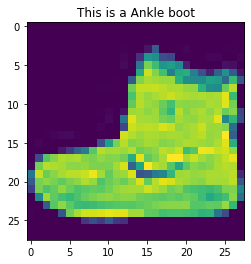

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.title(f"This is a {labels[train_labels[0]]}")
plt.show()

# 4. Let's build the model

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
len(set(train_labels))

10

In [13]:
# Let's start by using a 2D conv  kernel (3x3) with 16 channels using a relu activation
# Following a MaxPooling (3x3)
# And a fully connected layers of 10 neurons i.e. 1 for each predicted label using a softmax for values between 0 and 1

# CNN example here https://www.tensorflow.org/tutorials/images/cnn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)), #16 - número de filtros e dimensão do filtro (3x3) e input shape em cima
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax') #10 neurons 
])

# 5. Let's print out the model summary

In [14]:
model.summary() #cálculos da aula 3*3*16+16 // 8*8*16=1024 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


# 6. Let's compile the model

In [15]:
# Since we have a multiclass problem we need to use a suitable loss function. In this case we choose **sparse_categorical_crossentropy**.
# Check more info here https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
# Case we had hot hot encoded our outputs, like we did in the MNIST dataset we would use **categorical_crossentropy**
# Check more info here https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy

#só podiamos usar a categorical_crossentropy se fizessemos antes o one hot encoding, então como não fizemos usamos a sparce_categorical_crossentropy

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# 7. Fit the model

In [16]:
result = model.fit(train_images[:10000], train_labels[:10000], epochs=10, batch_size=100, validation_split=0.1)

Epoch 1/10
90/90 [==============================] - 2s 14ms/step - loss: 1.2834 - accuracy: 0.5864 - val_loss: 0.7998 - val_accuracy: 0.7250
Epoch 2/10
90/90 [==============================] - 1s 11ms/step - loss: 0.7087 - accuracy: 0.7447 - val_loss: 0.6603 - val_accuracy: 0.7780
Epoch 3/10
90/90 [==============================] - 1s 11ms/step - loss: 0.6041 - accuracy: 0.7832 - val_loss: 0.5918 - val_accuracy: 0.7950
Epoch 4/10
90/90 [==============================] - 1s 13ms/step - loss: 0.5506 - accuracy: 0.7981 - val_loss: 0.5790 - val_accuracy: 0.7950
Epoch 5/10
90/90 [==============================] - 1s 13ms/step - loss: 0.5161 - accuracy: 0.8140 - val_loss: 0.5260 - val_accuracy: 0.8010
Epoch 6/10
90/90 [==============================] - 1s 14ms/step - loss: 0.4862 - accuracy: 0.8209 - val_loss: 0.5089 - val_accuracy: 0.8180
Epoch 7/10
90/90 [==============================] - 1s 10ms/step - loss: 0.4650 - accuracy: 0.8351 - val_loss: 0.4881 - val_accuracy: 0.8300
Epoch 8/10
90

# 8. Let's add more layers

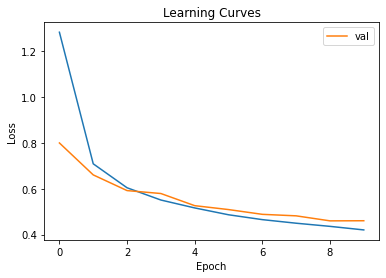

In [17]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(result.epoch, result.history["loss"])
plt.plot(result.history['val_loss'], label='val')
plt.legend()

# 9. Vizualize layers

In [18]:
# running model.layers it is possible to access all the internal layers of the model
model.layers

In [19]:
# to capture the weights we do 
conv1_filters, conv1_biases = model.layers[0].get_weights()

In [20]:
conv1_filters.shape #o que definimos em cima (3,3,16)

(3, 3, 1, 16)

In [21]:
# lets normalize filters 
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = conv1_filters.min(), conv1_filters.max()
conv1_filters = (conv1_filters - f_min) / (f_max - f_min)

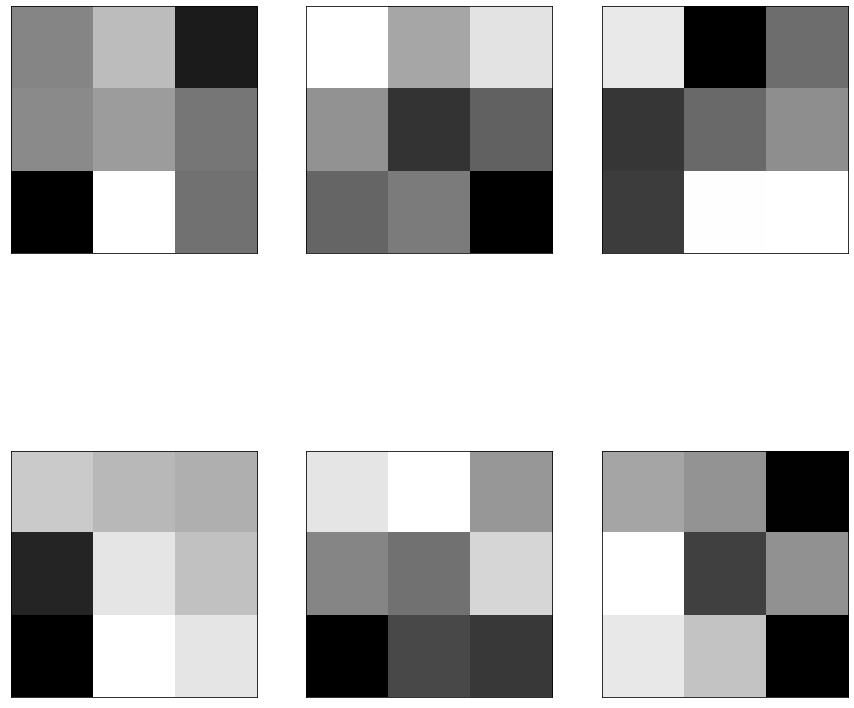

In [22]:
import matplotlib.pyplot as plt 
# plot first 6 filters
n_filters, ix = 6, 1
fig, ax = plt.subplots(2, 3, figsize=(15,15))
axs = ax.flat
for i in range(n_filters):
    # get the filter
    f = conv1_filters[:, :, :, i]
    # plot each channel separately
    # specify subplot and turn of axis
    
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    # plot filter channel in grayscale
    axs[i].imshow(f, cmap='gray')
    ix += 1
# show the figure
plt.show()

# 10. Let's create a bigger filter


In [53]:
# Let's start by using a 2D conv  kernel (5x5) with 16 channels using a relu activation
# Following a MaxPooling (5x5)
# And a fully connected layers of 10 neurons i.e. 1 for each predicted label using a softmax for values between 0 and 1

# CNN example here https://www.tensorflow.org/tutorials/images/cnn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(16, (5,5), activation='relu', input_shape=(28,28,1)), #16 - número de filtros e dimensão do filtro (3x3) e input shape em cima
    MaxPooling2D((5,5)),
    Flatten(),
    Dense(10, activation='softmax') #última rede - tem quer ser igual ao nº de classes - 10 
])

In [54]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2,986
Trainable params: 2,986
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [56]:
result = model.fit(train_images[:10000], train_labels[:10000], epochs=25, batch_size=100, validation_split=0.1)

Epoch 1/25
90/90 [==============================] - 2s 17ms/step - loss: 1.7513 - accuracy: 0.5261 - val_loss: 1.1138 - val_accuracy: 0.6950
Epoch 2/25
90/90 [==============================] - 1s 16ms/step - loss: 0.8701 - accuracy: 0.7253 - val_loss: 0.7616 - val_accuracy: 0.7290
Epoch 3/25
90/90 [==============================] - 1s 17ms/step - loss: 0.6964 - accuracy: 0.7527 - val_loss: 0.6861 - val_accuracy: 0.7590
Epoch 4/25
90/90 [==============================] - 1s 17ms/step - loss: 0.6336 - accuracy: 0.7709 - val_loss: 0.6232 - val_accuracy: 0.7670
Epoch 5/25
90/90 [==============================] - 1s 16ms/step - loss: 0.5867 - accuracy: 0.7896 - val_loss: 0.5853 - val_accuracy: 0.7880
Epoch 6/25
90/90 [==============================] - 1s 16ms/step - loss: 0.5567 - accuracy: 0.7979 - val_loss: 0.5719 - val_accuracy: 0.7940
Epoch 7/25
90/90 [==============================] - 1s 16ms/step - loss: 0.5334 - accuracy: 0.8087 - val_loss: 0.5418 - val_accuracy: 0.8110
Epoch 8/25
90

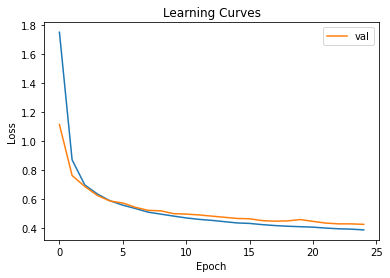

In [57]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(result.epoch, result.history["loss"])
plt.plot(result.history['val_loss'], label='val')
plt.legend()
#accuracy baixa e loss alta, está em underfitting, podemos continuar a treinar o modelo. Aumentando a amostra e e número de epochs

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(16, (5,5), activation='relu', input_shape=(28,28,1)), #16 - número de filtros e dimensão do filtro (3x3) e input shape em cima
    MaxPooling2D((5,5)),
    Flatten(),
    Dense(10, activation='softmax') #última rede - tem quer ser igual ao nº de classes - 10 
])

In [59]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2,986
Trainable params: 2,986
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [61]:
result = model.fit(train_images[:50000], train_labels[:50000], epochs=50, batch_size=100, validation_split=0.1) #aumentamos a amostra de para 50000 e aumento o nº de epochs para melhorar o modelo

Epoch 1/50
450/450 [==============================] - 8s 16ms/step - loss: 0.9105 - accuracy: 0.7066 - val_loss: 0.6117 - val_accuracy: 0.7738
Epoch 2/50
450/450 [==============================] - 7s 15ms/step - loss: 0.5469 - accuracy: 0.8048 - val_loss: 0.5108 - val_accuracy: 0.8182
Epoch 3/50
450/450 [==============================] - 7s 16ms/step - loss: 0.4842 - accuracy: 0.8281 - val_loss: 0.4674 - val_accuracy: 0.8334
Epoch 4/50
450/450 [==============================] - 7s 16ms/step - loss: 0.4512 - accuracy: 0.8387 - val_loss: 0.4429 - val_accuracy: 0.8420
Epoch 5/50
450/450 [==============================] - 7s 16ms/step - loss: 0.4293 - accuracy: 0.8471 - val_loss: 0.4314 - val_accuracy: 0.8488
Epoch 6/50
450/450 [==============================] - 7s 16ms/step - loss: 0.4143 - accuracy: 0.8516 - val_loss: 0.4189 - val_accuracy: 0.8512
Epoch 7/50
450/450 [==============================] - 8s 17ms/step - loss: 0.4033 - accuracy: 0.8560 - val_loss: 0.4166 - val_accuracy: 0.8498

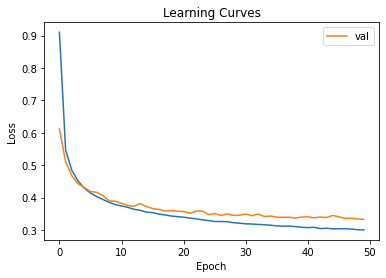

In [62]:
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(result.epoch, result.history["loss"])
plt.plot(result.history['val_loss'], label='val')
plt.legend()